In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import random
import numpy as np
from PIL import Image
import pandas as pd
import os 
import matplotlib.pyplot as plt
import math
import random

In [15]:
words=open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [19]:
chars=sorted(list(set(''.join(words))))
s_to_i={s:i+1 for i,s in enumerate(chars) }
s_to_i['.']=0
i_to_s={i:s for s,i in s_to_i.items()}
s_to_i

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [133]:
context_length=3
x,y=[],[]
for w in words:
    # print(w)
    context=[0]*context_length
    for ch in w+'.':
        idx=s_to_i[ch]
        x.append(context)
        y.append(idx)
        # print(''.join(i_to_s[i] for i in context),'--->',i_to_s[idx])
        context=context[1:]+[idx]



In [260]:
def build_dataset(words):
    context_length=3
    x,y=[],[]
    for w in words:
        # print(w)
        context=[0]*context_length
        for ch in w+'.':
            idx=s_to_i[ch]
            x.append(context)
            y.append(idx)
            # print(''.join(i_to_s[i] for i in context),'--->',i_to_s[idx])
            context=context[1:]+[idx]
    x=torch.tensor(x)
    y=torch.tensor(y)
    print(x.shape,y.shape)
    return x,y


random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

x_train,y_train=build_dataset(words[:n1])
x_val,y_val=build_dataset(words[n1:n2])
x_test,y_test=build_dataset(words[n2:])


torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [135]:
x=torch.tensor(x)
y=torch.tensor(y)
x.shape,y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [36]:
x

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [37]:
y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [60]:
# now as we are working only with a vocablury of 27, we will use a small embeded space 
# creating a 2-D embeded space consisting of 27 elements 

C=torch.randn((27,2))
C

tensor([[ 0.6996,  0.9450],
        [ 1.0915, -0.8804],
        [ 0.2659, -0.3368],
        [ 0.8033, -0.7323],
        [-0.9037,  1.6199],
        [-0.6739,  0.2331],
        [-1.7445,  0.7294],
        [-1.0849, -0.3946],
        [ 0.6170, -1.9124],
        [-0.0057,  0.6891],
        [-0.4961, -2.1247],
        [ 1.5746, -1.2262],
        [ 1.0490,  0.7494],
        [-1.2506, -0.4883],
        [ 1.1323,  2.4393],
        [ 1.4052, -0.3934],
        [ 0.6596, -0.3857],
        [ 0.9619, -1.5116],
        [-0.9323, -0.0884],
        [-0.1020,  0.0784],
        [-0.1077, -0.9294],
        [ 1.7247,  0.9633],
        [-1.0918, -0.6183],
        [-2.3765,  0.2626],
        [-0.7147,  0.3186],
        [-0.8836,  2.3831],
        [ 0.3851,  0.6785]])

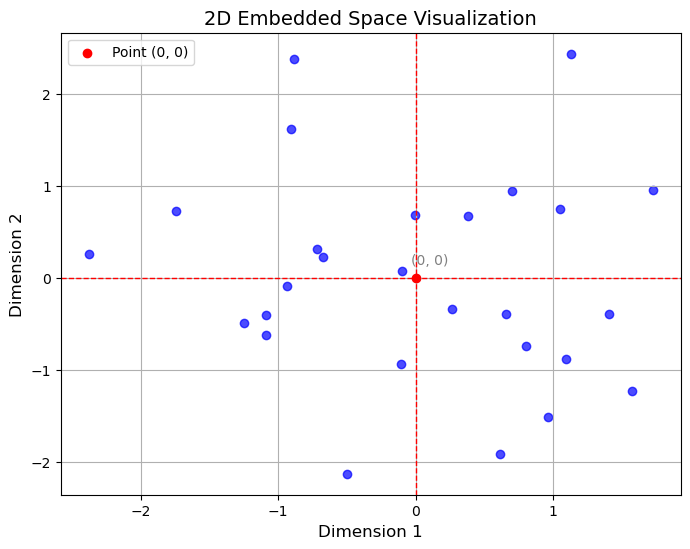

In [61]:
coordinate = (0,0)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(C[:, 0].numpy(), C[:, 1].numpy(), color='blue', alpha=0.7)  # Scatter points
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line (y=0)
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Vertical line (x=0)

# Mark the coordinate
plt.scatter(*coordinate, color='red', label=f'Point {coordinate}', zorder=5)  # Highlight the point
plt.annotate(f'{coordinate}', 
             coordinate, 
             textcoords="offset points", 
             xytext=(10, 10), 
             ha='center', 
             fontsize=10, 
             color='gray')  # Label the point

# Labels and grid
plt.title('2D Embedded Space Visualization', fontsize=14)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [62]:
# accesing a single vector from embeded space or embedding a vector
C[5] # 6th vector in our embeded space 

tensor([-0.6739,  0.2331])

In [63]:
# another way to access this vector is..      but we will still using indexing beacuse it is faster 
import torch.nn.functional as F

F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([-0.6739,  0.2331])

In [64]:
C[[5,6,7]]

tensor([[-0.6739,  0.2331],
        [-1.7445,  0.7294],
        [-1.0849, -0.3946]])

In [65]:
C[torch.tensor([5,6,7,8])]

tensor([[-0.6739,  0.2331],
        [-1.7445,  0.7294],
        [-1.0849, -0.3946],
        [ 0.6170, -1.9124]])

In [68]:
x

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [72]:
emb=C[x] # each row of x has 3 letters and  c[x] embeds each letter into the embeded space 

In [73]:
C[x].shape

torch.Size([32, 3, 2])

In [99]:
# creating hidden layer for tuning the embedded space 
# 100 is the no. of neurons and we have taken 6, as one sample of x has 3 letters and each is 2-d therefor one x sample consits of 6 numbers
w1=torch.randn((6,100))   
b1=torch.randn(100)

In [94]:
# now to make input form 3x2 to 6 we have to cancat all 3 words 
emb[:,0].shape,emb[:,1].shape,emb[:,2].shape   # these are 3 differnt columns of 32 2-d letters

(torch.Size([32, 2]), torch.Size([32, 2]), torch.Size([32, 2]))

In [95]:
torch.cat([emb[:,0],emb[:,1],emb[:,2]],  1).shape  #concatinating along the columns 

torch.Size([32, 6])

In [96]:
# now the above code is a bit ugly as we we have to change it fully if we change context length thus we uze unbind
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [97]:
# another way to do this is by using view()
emb.view(32,6).shape

torch.Size([32, 6])

In [104]:
h= torch.tanh(emb.view(emb.shape[0],6) @ w1 + b1 )
# instaed of emb.shape[32] we can replacd that with -1

In [105]:
h.shape

torch.Size([32, 100])

In [107]:
w2=torch.randn((100,27))   
b2=torch.randn(27)


In [109]:
logits=(h @ w2)+ b2
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)
probs.shape

torch.Size([32, 27])

In [111]:
loss=-probs[torch.arange(32),y].log().mean()
loss

tensor(16.3295)

In [145]:
# pipeline 
x.shape,y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [405]:
#main model 
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,2),generator=g)
w1=torch.randn((6,300),generator=g)   
b1=torch.randn((300),generator=g)
w2=torch.randn((300,27),generator=g)   
b2=torch.randn((27),generator=g)

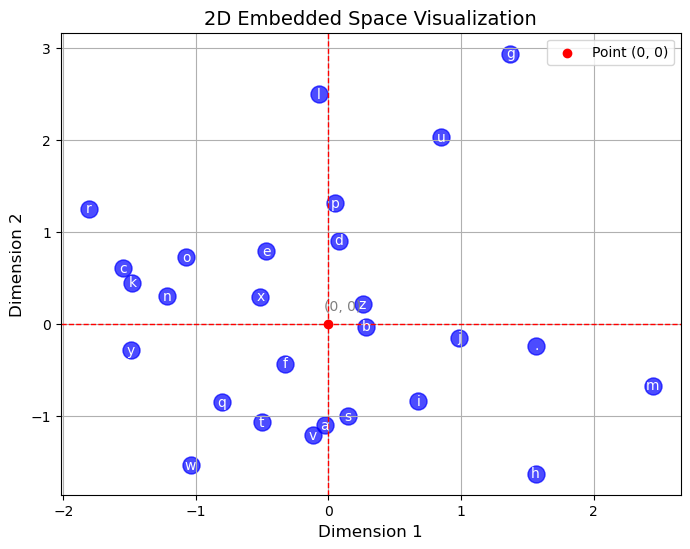

In [406]:
coordinate = (0,0)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(C[:, 0].numpy(), C[:, 1].numpy(), color='blue', alpha=0.7,s=150)  # Scatter points
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line (y=0)
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Vertical line (x=0)

# Mark the coordinate
plt.scatter(*coordinate, color='red', label=f'Point {coordinate}', zorder=5)  # Highlight the point
plt.annotate(f'{coordinate}', 
             coordinate, 
             textcoords="offset points", 
             xytext=(10, 10), 
             ha='center', 
             fontsize=10, 
             color='gray')  # Label the point

# Labels and grid
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),i_to_s[i],ha='center',va="center",color='white')
plt.title('2D Embedded Space Visualization', fontsize=14)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [407]:
parameters=[C,w1,w2,b1,b2]
sum(p.nelement() for p in parameters)

10281

In [408]:
for p in parameters:
    p.requires_grad=True

In [409]:
# how to decide a good leaarning rate 
lre=torch.linspace(-3,0,1000)
lrs=10**lre

# thus we are takeing exponentially increasing lrs from 10e-3 to 10e-0 i.e 0.0001 to 1 

In [374]:
loss_list=[]
lri=[]
lossi=[]
lrex=[]
for i in range(1000):
    #minibatch construct
    ix=torch.randint(0,x.shape[0],(32,))  # batch size =32
    #foward pass
    emb=C[x[ix]]
    h= torch.tanh(emb.view(emb.shape[0],6) @ w1 + b1 )
    logits=(h @ w2)+ b2
    # counts=logits.exp()
    # probs=counts/counts.sum(1,keepdims=True)
    # loss=-probs[torch.arange(32),y].log().mean()
    # the eqivalent of this cross entropy 
    loss=F.cross_entropy(logits,y[ix])
    loss_list.append(loss.item())
    if i%50==0:
        print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    lr=lrs[i]
    for p in parameters:
        p.data+=-lr*p.grad

    # track stats
    lri.append(lr)
    lrex.append(lre[i])
    lossi.append(loss.item())






27.505844116210938
27.676578521728516
22.4405517578125
20.426382064819336
21.867141723632812
15.552268028259277
16.218830108642578
11.783270835876465
10.392375946044922
5.805389404296875
7.096617698669434
4.815094947814941
4.451939582824707
4.381538391113281
3.97550630569458
6.4743170738220215
6.32970666885376
10.560826301574707
15.260774612426758
15.578369140625


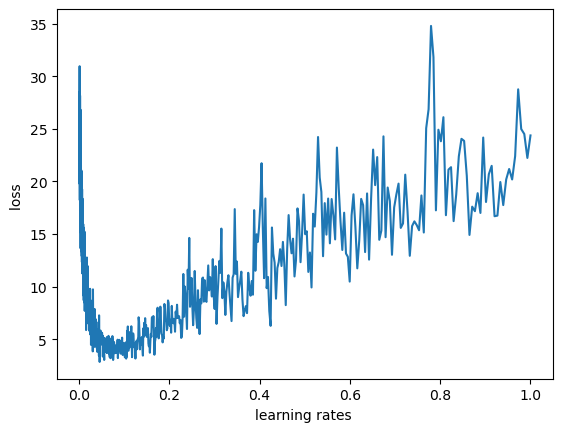

In [375]:
plt.plot(lri,lossi)
plt.xlabel('learning rates ')
plt.ylabel('loss ')
plt.show()

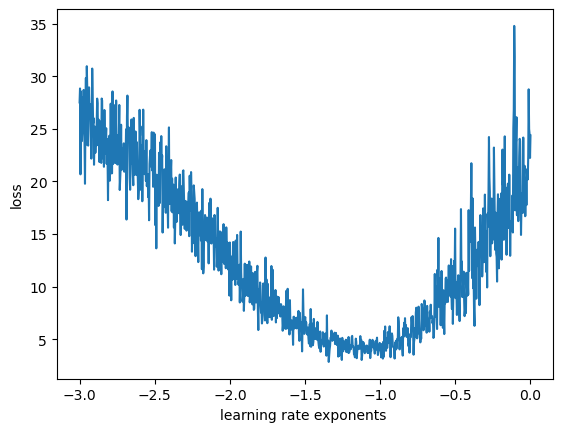

In [376]:
plt.plot(lrex,lossi)
plt.xlabel('learning rate exponents ')
plt.ylabel('loss')
plt.show()

In [ ]:
# thus lr btw 10e-1 and 10e-0.5 is good 

In [424]:
loss_list=[]
lri=[]
lossi=[]
lrex=[]
stepi=[]
for i in range(30000):
    #minibatch construct
    ix=torch.randint(0,x_train.shape[0],(32,))  # batch size =32
    #foward pass
    emb=C[x_train[ix]]
    h= torch.tanh(emb.view(emb.shape[0],6) @ w1 + b1 )
    logits=(h @ w2)+ b2
    # counts=logits.exp()
    # probs=counts/counts.sum(1,keepdims=True)
    # loss=-probs[torch.arange(32),y].log().mean()
    # the eqivalent of this cross entropy 
    loss=F.cross_entropy(logits,y_train[ix])
    loss_list.append(loss.item())
    if i%1000==0:
        print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    for p in parameters:
            p.data+=-0.05*p.grad

     # track stats
    lossi.append(loss.item())






2.143155097961426
2.1233339309692383
2.5597243309020996
2.3059937953948975
2.546050786972046
2.5430989265441895
1.9935567378997803
1.9745821952819824
2.313459634780884
1.8856009244918823
2.090721368789673
2.040503740310669
2.3981966972351074
2.7110280990600586
2.2895774841308594
2.003734827041626
2.2368855476379395
2.5650112628936768
1.9630118608474731
2.790940523147583
2.088146686553955
2.1616132259368896
2.5066604614257812
2.4526498317718506
2.149492025375366
2.105116605758667
2.5313303470611572
2.49220871925354
2.356027603149414
2.661638021469116


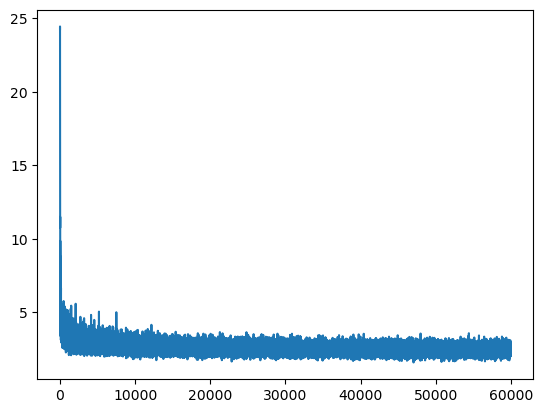

In [411]:
plt.plot(loss_list)


In [425]:
emb=C[x_train]
h= torch.tanh(emb.view(emb.shape[0],6) @ w1 + b1 )
logits=(h @ w2)+ b2
loss=F.cross_entropy(logits,y_train)
loss

tensor(2.2712, grad_fn=<NllLossBackward0>)

In [426]:
emb=C[x_val]
h= torch.tanh(emb.view(emb.shape[0],6) @ w1 + b1 )
logits=(h @ w2)+ b2
loss=F.cross_entropy(logits,y_val)
loss

tensor(2.2864, grad_fn=<NllLossBackward0>)

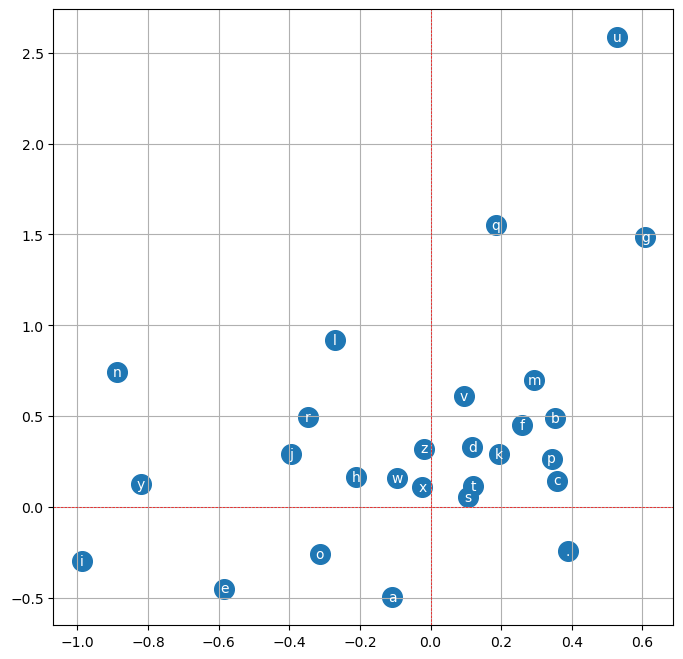

In [427]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].detach().numpy(),C[:,1].detach().numpy(),s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),i_to_s[i],ha='center',va="center",color='white')
plt.grid('minor')
plt.axhline(0,color='red',linestyle='--',linewidth=0.5)
plt.axvline(0,color='red',linestyle='--',linewidth=0.5)

In [467]:
# training moodel on an 10-D embeded space  

g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator=g)
w1=torch.randn((30,200),generator=g)   
b1=torch.randn((200),generator=g)
w2=torch.randn((200,27),generator=g)   
b2=torch.randn((27),generator=g)

In [468]:
parameters=[C,w1,w2,b1,b2]
sum(p.nelement() for p in parameters)

11897

In [469]:
for p in parameters:
    p.requires_grad=True

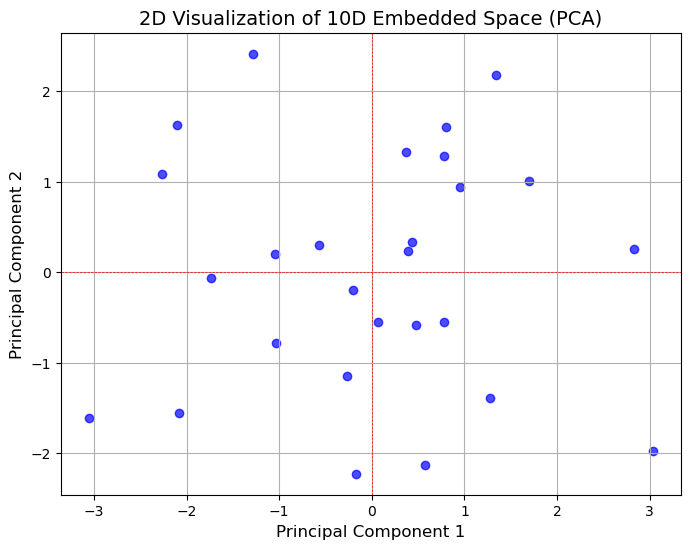

In [471]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
C_2d = pca.fit_transform(C.detach().numpy())

# Plot the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(C_2d[:, 0], C_2d[:, 1], color='blue', alpha=0.7)
plt.grid('minor')
plt.axhline(0,color='red',linestyle='--',linewidth=0.5)
plt.axvline(0,color='red',linestyle='--',linewidth=0.5)
plt.title('2D Visualization of 10D Embedded Space (PCA)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

plt.grid(True)
plt.show()


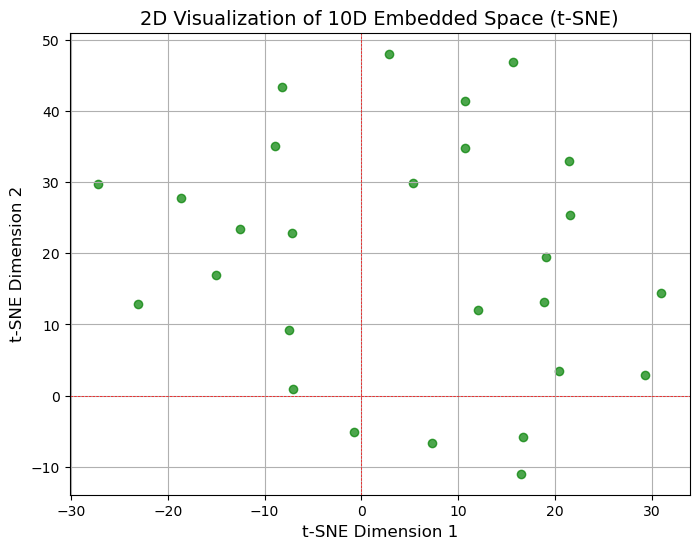

In [472]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Perform t-SNE with reduced perplexity
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Set perplexity < 27
C_2d_tsne = tsne.fit_transform(C.detach().numpy())

# Plot the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(C_2d_tsne[:, 0], C_2d_tsne[:, 1], color='green', alpha=0.7)
plt.title('2D Visualization of 10D Embedded Space (t-SNE)', fontsize=14)
plt.axhline(0,color='red',linestyle='--',linewidth=0.5)
plt.axvline(0,color='red',linestyle='--',linewidth=0.5)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(True)
plt.show()


In [465]:
loss_list=[]
lri=[]
lossi=[]
lrex=[]
steps=[]

In [479]:
for i in range(50000):
    #minibatch construct
    ix=torch.randint(0,x_train.shape[0],(32,))  # batch size =32
    #foward pass
    emb=C[x_train[ix]]
    h= torch.tanh(emb.view(emb.shape[0],30) @ w1 + b1 )
    logits=(h @ w2)+ b2
    # counts=logits.exp()
    # probs=counts/counts.sum(1,keepdims=True)
    # loss=-probs[torch.arange(32),y].log().mean()
    # the eqivalent of this cross entropy 
    loss=F.cross_entropy(logits,y_train[ix])
    loss_list.append(loss.item())
    if i%1000==0:
        print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    for p in parameters:
            p.data+=-0.01*p.grad

     # track stats
    steps.append(i)
    lossi.append(loss.log10().item())






2.3700222969055176
2.1251792907714844
2.3225204944610596
2.298996686935425
2.3085155487060547
2.325469493865967
2.3284692764282227
2.1002516746520996
1.7505682706832886
2.12865948677063
1.8577289581298828
2.2495107650756836
1.7670961618423462
2.3599131107330322
2.039018392562866
1.7309792041778564
2.1651196479797363
2.088657855987549
2.2136752605438232
2.5792763233184814
2.147090435028076
1.906679630279541
2.058713436126709
2.032689332962036
1.9844062328338623
2.34840989112854
1.7964953184127808
2.2803690433502197
2.488075017929077
2.2226858139038086
2.1254241466522217
2.2165050506591797
2.2297451496124268
1.9666342735290527
2.2317392826080322
2.052238702774048
2.2807724475860596
2.3725223541259766
2.0642285346984863
1.91667902469635
2.680500030517578
1.7869527339935303
2.664323568344116
2.142692804336548
2.30928373336792
2.1139283180236816
1.967340350151062
1.8317413330078125
2.1253879070281982
2.325500011444092


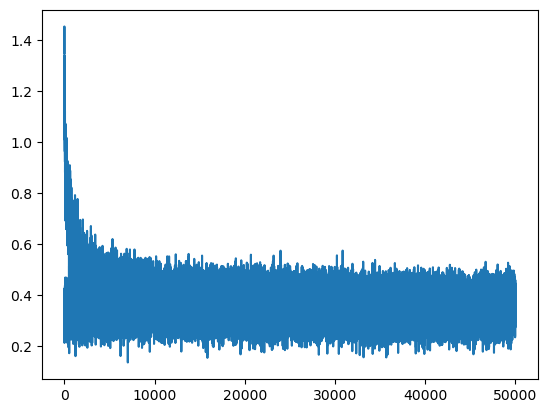

In [480]:
plt.plot(steps,lossi)


In [481]:
emb=C[x_train]
h= torch.tanh(emb.view(emb.shape[0],30) @ w1 + b1 )
logits=(h @ w2)+ b2
loss=F.cross_entropy(logits,y_train)
loss

tensor(2.1675, grad_fn=<NllLossBackward0>)

In [482]:
emb=C[x_val]
h= torch.tanh(emb.view(emb.shape[0],30) @ w1 + b1 )
logits=(h @ w2)+ b2
loss=F.cross_entropy(logits,y_val)
loss

tensor(2.1913, grad_fn=<NllLossBackward0>)

In [483]:
emb=C[x_test]
h= torch.tanh(emb.view(emb.shape[0],30) @ w1 + b1 )
logits=(h @ w2)+ b2
loss=F.cross_entropy(logits,y_test)
loss

tensor(2.1995, grad_fn=<NllLossBackward0>)

In [492]:
# sampling from the moodel 
g=torch.Generator().manual_seed(2147483647)
for i in range(20):
    out=[]
    context=[0]*context_length
    while True:
        emb=C[torch.tensor([context])] #(1,conntext_length,d)
        h= torch.tanh(emb.view(1,-1) @ w1 + b1 )
        logits=(h @ w2)+ b2
        probs=F.softmax(logits,dim=1)
        idx=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:]+[idx]
        out.append(idx)
        if idx==0:
            break
    print(''.join(i_to_s[i] for i in out))

junide.
jaycen.
julisay.
adin.
kai.
rito.
sabe.
tem.
kalinaa.
yamilena.
jedeyaine.
imellse.
yanayla.
terinveumerif.
demmerconneliah.
jaylynora.
yaenocklynn.
britta.
miki.
wynle.
